# Examples using jointcd
In this notebook we illustrate how the jointcd package can be used for change detection and change point estimation by applying it to synthetic data. 

In [1]:
from jointcd import ChangeDetector, ChangePointEstimator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(420)

## Change Detection
Here we use jointcd to detect which signals experienced change. A synthetic data set is created comprised of two types of signals. Each signal is a sinusoidal oscillation corrupted by noise. The second type of signal has a shifted mean. A change signal is a transition between from one to the other.

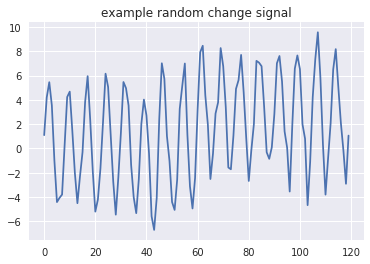

In [2]:
n1, n2, len_signals = 1000,200, 120
n_change_signals = 100
step = 3.0
amplitude = 5.0
# create the synthetic data set
oscil = amplitude*np.sin(np.linspace(0,100,len_signals))

type1 = np.random.randn(n1, len_signals) + oscil
type2 = np.random.randn(n2, len_signals) + step + oscil
change = np.concatenate([
    np.random.randn(n_change_signals, len_signals/2),
    np.random.randn(n_change_signals, len_signals/2) + step], axis=1) + oscil

X = np.concatenate([
    type1,
    type2,
    change
], axis=0)

# create the labels. 0 -> no change, 1 -> change
y = np.zeros(X.shape[0])
y[-n_change_signals:] = 1

plt.plot(X[-1,:])
plt.title('example random change signal')
plt.show()

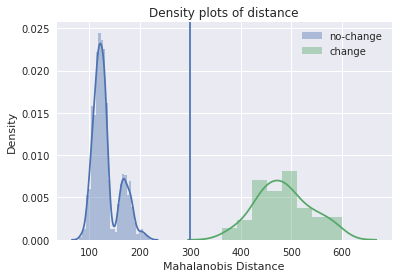

In [8]:
cd = ChangeDetector(method='robust')
threshold = 300

pred, dists = cd.fit(X).predict(X, threshold)
sns.distplot(dists[y==0], label='no-change')
sns.distplot(dists[y==1], label='change')
plt.legend()
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Density")
plt.axvline(threshold)
plt.title("Density plots of distance")
plt.show()

## Change Point Estimation
using the same data set we will estimate the time of change using the ChangePointEstimator class. Note all time series have the same change point (t=60) to simplify analysis.

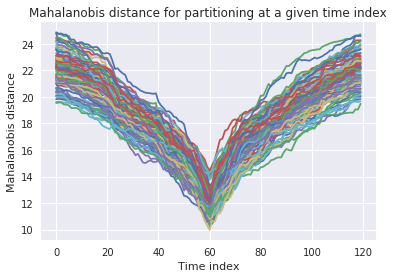

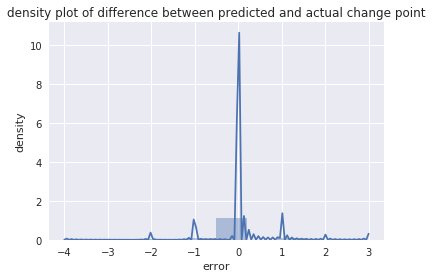

In [4]:
cpe = ChangePointEstimator(method='robust')
change_points, distance_signals = cpe.fit(X).predict(change)

plt.plot(distance_signals.T)
plt.title("Mahalanobis distance for partitioning at a given time index")
plt.xlabel("Time index")
plt.ylabel("Mahalanobis distance")
plt.show()

sns.distplot(change_points - len_signals/2)
plt.title("density plot of difference between predicted and actual change point")
plt.ylabel("density")
plt.xlabel("error")
plt.show()